# Setup

In [1]:
!pip install segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
import os
import numpy as np

from keras.models import Sequential, model_from_json
import keras.backend as K
from tensorflow.keras.preprocessing.image import load_img


import matplotlib.pyplot as plt

In [5]:
import shutil
import keras

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Loading Model

In [8]:
import segmentation_models as sm
sm.set_framework('tf.keras')
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

Segmentation Models: using `keras` framework.


In [9]:
path_to_load_json = '/content/gdrive/MyDrive/Omdena/OpenCities/unet_baseline/model_unet.json'
path_to_load_model = '/content/gdrive/MyDrive/Omdena/OpenCities/unet_baseline/model_unet.h5'

In [10]:
# load json and create model
json_file = open(path_to_load_json, 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights(path_to_load_model)
print("Loaded model from disk")

Loaded model from disk


In [11]:
num_layers = len(model.layers)
to_freeze = int(0.6*num_layers)

In [12]:
for i in range(to_freeze): 
  model.layers[i].trainable  = False 

for layer in model.layers:
  print(layer.trainable) 

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
T

# Define Helper Functions

In [13]:
IMAGE_SIZE = 256

def open_images(paths, is_mask=False):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        if is_mask:
          image = np.mean(image, axis=-1)/255.0
        else:
          image = np.array(image)/255.0
        images.append(image)
    return np.array(images)

# Loading Data

## Loading Image Paths

In [14]:
def get_image_paths(path, images = True) -> list: 
  """ Returns a list of image or masks paths from a folder""" 
  paths = [path + fname for fname in os.listdir(path)]
  to_return = []
  if images: 
    png_images = []
    for image in paths: 
      if (image.endswith('.tif')): 
        png_images.append(image)
    to_return = png_images
  else: 
    to_return = paths 
  return sorted(to_return) 

In [15]:
images_1 = "/content/gdrive/MyDrive/Omdena/data/images_v2/1/"
#images_2 = "/content/gdrive/MyDrive/Omdena/data/from_hot/2/"
#images_3 = "/content/gdrive/MyDrive/Omdena/data/from_hot/3/"
#images_4 = "/content/gdrive/MyDrive/Omdena/data/from_hot/4/"
#images_5 = "/content/gdrive/MyDrive/Omdena/data/from_hot/5/"
all_image_paths = get_image_paths(images_1) 

In [16]:
masks_1 = "/content/gdrive/MyDrive/Omdena/data/masks_v2/1/"
#masks_2 = "/content/gdrive/MyDrive/Omdena/data/rasterized_labels/2/"
#masks_3 = "/content/gdrive/MyDrive/Omdena/data/rasterized_labels/3/"
#masks_4 = "/content/gdrive/MyDrive/Omdena/data/rasterized_labels/4/"
#masks_5 = "/content/gdrive/MyDrive/Omdena/data/rasterized_labels/5/"
all_masks_paths = get_image_paths(masks_1, images=False) 

In [17]:
all_image_paths=sorted(all_image_paths)
all_masks_paths=sorted(all_masks_paths)

In [18]:
all_image_paths[:5]

['/content/gdrive/MyDrive/Omdena/data/images_v2/1/OAM-1277168-1083840-21.tif',
 '/content/gdrive/MyDrive/Omdena/data/images_v2/1/OAM-1277168-1083841-21.tif',
 '/content/gdrive/MyDrive/Omdena/data/images_v2/1/OAM-1277168-1083842-21.tif',
 '/content/gdrive/MyDrive/Omdena/data/images_v2/1/OAM-1277168-1083843-21.tif',
 '/content/gdrive/MyDrive/Omdena/data/images_v2/1/OAM-1277168-1083844-21.tif']

In [19]:
all_masks_paths[:5]

['/content/gdrive/MyDrive/Omdena/data/masks_v2/1/OAM-1277168-1083840-21.tif',
 '/content/gdrive/MyDrive/Omdena/data/masks_v2/1/OAM-1277168-1083841-21.tif',
 '/content/gdrive/MyDrive/Omdena/data/masks_v2/1/OAM-1277168-1083842-21.tif',
 '/content/gdrive/MyDrive/Omdena/data/masks_v2/1/OAM-1277168-1083843-21.tif',
 '/content/gdrive/MyDrive/Omdena/data/masks_v2/1/OAM-1277168-1083844-21.tif']

## Restructuring Data Organization

In [20]:
#define function that creates the directories needed 

root_dir = '/content/data'
def create_directories(root_dir): 
  os.makedirs(os.path.join(root_dir, 'training/images/img'))
  os.makedirs(os.path.join(root_dir, 'training/masks/img'))
  os.makedirs(os.path.join(root_dir, 'validation/images/img'))
  os.makedirs(os.path.join(root_dir, 'validation/masks/img'))


create_directories(root_dir)

In [21]:
#define function that writes the data into corresponding directories

def split_data(all_images, all_masks, training_dir, validation_dir, split_size): 

  assert len(all_images) == len(all_masks) 
  training_size = int(len(all_images) * (1-split_size))

  print("[INFO] DEFINING TRAINING AND VALIDATION IMAGES")
  training_images = all_images[:training_size]
  training_masks = all_masks[:training_size]
  val_images = all_images[training_size:]
  val_masks = all_masks[training_size:]

  print("[INFO] DEFINING NEEDED PATHS")
  training_images_path = os.path.join(training_dir, 'images/img')
  training_masks_path = os.path.join(training_dir, 'masks/img')
  val_images_path = os.path.join(validation_dir, 'images/img')
  val_masks_path = os.path.join(validation_dir, 'masks/img')

  print("[INFO] COPYING IMAGES")
  for i in range(len(training_images)):
    img_index = str(i) + '.png'
    shutil.copy2(training_images[i], os.path.join(training_images_path, img_index))
    shutil.copy2(training_masks[i], os.path.join(training_masks_path, img_index))
  for i in range(len(val_images)):
    img_index = str(i) + '.png'
    shutil.copy2(val_images[i], os.path.join(val_images_path, img_index))
    shutil.copy2(val_masks[i], os.path.join(val_masks_path, img_index))

In [22]:
split_data(all_image_paths, all_masks_paths, '/content/data/training', '/content/data/validation', 0.1)

[INFO] DEFINING TRAINING AND VALIDATION IMAGES
[INFO] DEFINING NEEDED PATHS
[INFO] COPYING IMAGES


## Load the Restructured Data

In [16]:
IMAGE_SIZE = 256

In [17]:
train_images_path = "/content/data/training/images/img"
train_masks_path = "/content/data/training/masks/img"
val_images_path = "/content/data/validation/images/img"
val_masks_path = "/content/data/validation/masks/img"

In [18]:
def get_image_paths(source_dir): 
  return [os.path.join(source_dir, path) for path in os.listdir(source_dir)]

In [19]:
IMAGE_SIZE = 256

def open_images(paths, is_mask=False):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        if is_mask:
          image = np.mean(image, axis=-1)/255.0
        else:
          image = np.array(image)/255.0
        images.append(image)
    return np.array(images)

In [20]:
def plot_images(sample_image, sample_mask, title):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18.5, 10.5)
  fig.suptitle(title)
  ax1.imshow(sample_image, cmap='gray')
  ax2.imshow(sample_mask, cmap='gray') 

In [21]:
train_images = get_image_paths(train_images_path)
print(f"LOADED {len(train_images)} IMAGES FOR TRAINING")
train_masks = get_image_paths(train_masks_path)
assert len(train_images) == len(train_masks)


val_images = get_image_paths(val_images_path)
print(f"LOADED {len(val_images)} IMAGES FOR VALIDATION")
val_masks = get_image_paths(val_masks_path)
assert len(val_masks) == len(val_masks)

LOADED 869 IMAGES FOR TRAINING
LOADED 97 IMAGES FOR VALIDATION


## Visualize Some Images from Training Data 

In [22]:
sample_train_images = open_images(train_images[:10])
sample_train_masks = open_images(train_masks[:10], True)

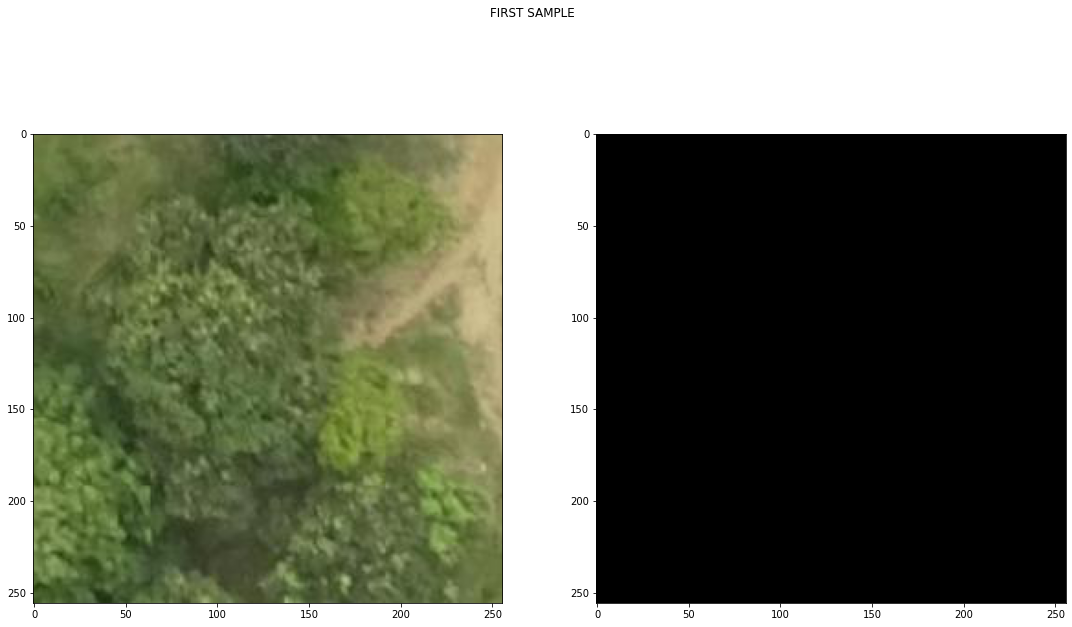

In [23]:
index = -2
sample_image = sample_train_images[index]
sample_mask = sample_train_masks[index]
plot_images(sample_image, sample_mask, "FIRST SAMPLE")

## Visualize some images from the validation data

In [22]:
sample_val_images = open_images(val_images[:10])
sample_val_masks = open_images(val_masks[:10], True)

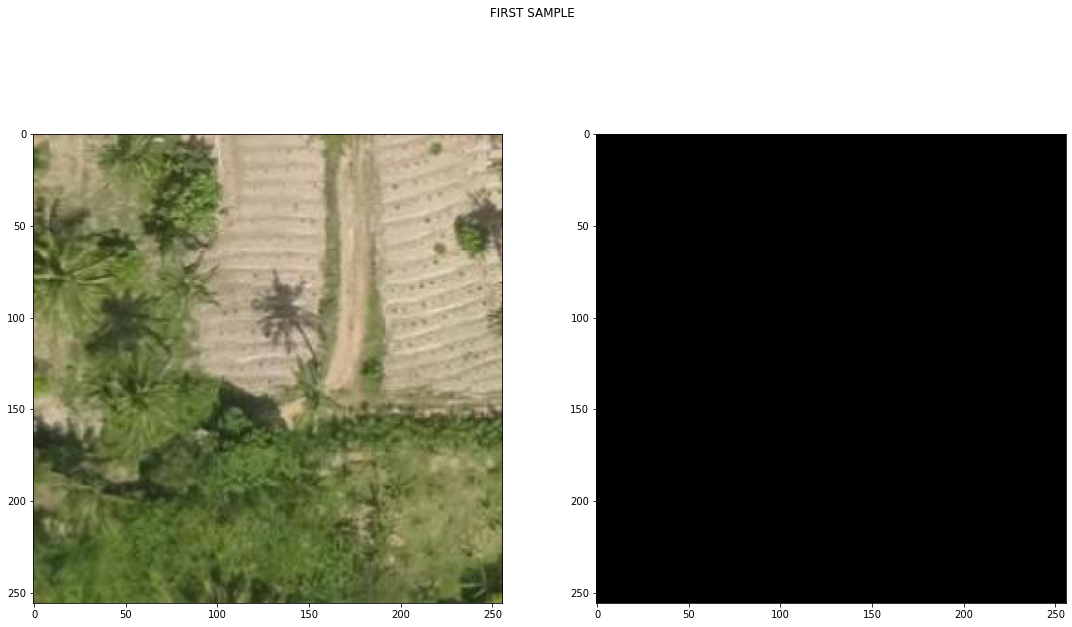

In [23]:
index = 0 
sample_image = sample_val_images[index]
sample_mask = sample_val_masks[index]
plot_images(sample_image, sample_mask, "FIRST SAMPLE")

## Define data generators

In [24]:
train_images_path = "/content/data/training/images/"
train_masks_path = '/content/data/training/masks/'

val_images_path = '/content/data/validation/images/'
val_masks_path =  '/content/data/validation/masks/'

In [25]:
seed = 909 # (IMPORTANT) to transform image and corresponding mask with same augmentation parameter.
image_datagen_train = ImageDataGenerator(rescale=1/255.) 
mask_datagen_train = ImageDataGenerator(rescale=1/255.) 

image_datagen_val = ImageDataGenerator(rescale = 1/255.)
image_datagen_val = ImageDataGenerator(rescale = 1/255.)

#preprocessing_function = preprocess_input
train_image_generator =image_datagen_train.flow_from_directory(train_images_path, class_mode=None, seed=seed)
train_mask_generator = mask_datagen_train.flow_from_directory(train_masks_path, class_mode=None, seed=seed)

val_image_generator = image_datagen_val.flow_from_directory(val_images_path, class_mode=None, seed=seed)
val_mask_generator = image_datagen_val.flow_from_directory(val_masks_path, class_mode=None, seed=seed)


train_generator = zip(train_image_generator, train_mask_generator)
val_generator = zip(val_image_generator, val_mask_generator)

Found 869 images belonging to 1 classes.
Found 869 images belonging to 1 classes.
Found 97 images belonging to 1 classes.
Found 97 images belonging to 1 classes.


# Finetune the model

## Define your callbacks

In [26]:
callbacks = keras.callbacks.EarlyStopping(monitor="val_iou_score", patience=4, mode="max", restore_best_weights=True)

# Run the training again

In [27]:
batch_size = 16
steps_per_epoch = 869// batch_size 
validation_steps = 97 // batch_size 
epochs = 60

In [28]:
model.compile(keras.optimizers.Adam(learning_rate=1e-4),
    loss=sm.losses.dice_loss,
    metrics=[sm.metrics.iou_score])

In [29]:
history = model.fit_generator(train_generator, steps_per_epoch = steps_per_epoch, validation_data=val_generator,  epochs=epochs, validation_steps = validation_steps, callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/60
54/54 [==============================] - 33s 418ms/step - loss: 0.2698 - iou_score: 0.5925 - val_loss: 0.1727 - val_iou_score: 0.6590
Epoch 2/60
54/54 [==============================] - 19s 354ms/step - loss: 0.1980 - iou_score: 0.6709 - val_loss: 0.1655 - val_iou_score: 0.5992
Epoch 3/60
54/54 [==============================] - 18s 342ms/step - loss: 0.1731 - iou_score: 0.7075 - val_loss: 0.1513 - val_iou_score: 0.7636
Epoch 4/60
54/54 [==============================] - 19s 356ms/step - loss: 0.1533 - iou_score: 0.7357 - val_loss: 0.1495 - val_iou_score: 0.6235
Epoch 5/60
54/54 [==============================] - 18s 340ms/step - loss: 0.1501 - iou_score: 0.7228 - val_loss: 0.1435 - val_iou_score: 0.6314
Epoch 6/60
54/54 [==============================] - 19s 347ms/step - loss: 0.1301 - iou_score: 0.7715 - val_loss: 0.1346 - val_iou_score: 0.6351
Epoch 7/60
54/54 [==============================] - 19s 348ms/step - loss: 0.1311 - iou_score: 0.7627 - val_loss: 0.1444 - val_iou

# plot Learning Curves

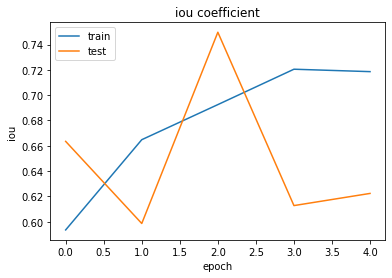

In [30]:
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('iou coefficient')
plt.ylabel('iou')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
path_to_save_json = '/content/gdrive/MyDrive/Omdena/finetuned_models/model_finetuned1.json'
path_to_save_model = '/content/gdrive/MyDrive/Omdena/finetuned_models/model_finetuned1.h5'
model_json = model.to_json()
with open(path_to_save_json, 'w') as json_file: 
  json_file.write(model_json)

model.save_weights(path_to_save_model)

# Sample Predictions

In [39]:
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential, model_from_json
import matplotlib.pyplot as plt
import os
import numpy as np

In [40]:
import segmentation_models as sm
sm.set_framework('tf.keras')
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [41]:
path_to_load_json = '/content/gdrive/MyDrive/Omdena/finetuned_models/model_finetuned1.json'
path_to_load_model = '/content/gdrive/MyDrive/Omdena/finetuned_models/model_finetuned1.h5'

In [42]:
# load json and create model
json_file = open(path_to_load_json, 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights(path_to_load_model)
print("Loaded model from disk")

Loaded model from disk


In [43]:
IMAGE_SIZE = 256

def open_images(paths, is_mask=False):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        if is_mask:
          image = np.mean(image, axis=-1)/255.0
        else:
          image = np.array(image)/255.0
        images.append(image)
    return np.array(images)

In [44]:
def get_image_paths(path, images = True) -> list: 
  """ Returns a list of image or masks paths from a folder""" 
  paths = [path + fname for fname in os.listdir(path)]
  to_return = []
  if images: 
    png_images = []
    for image in paths: 
      if (image.endswith('.tif')): 
        png_images.append(image)
    to_return = png_images
  else: 
    to_return = paths 
  return sorted(to_return) 

In [45]:
images_1 = "/content/gdrive/MyDrive/Omdena/data/images_v2/1/"
all_image_paths = get_image_paths(images_1) 

In [46]:
masks_1 = "/content/gdrive/MyDrive/Omdena/data/masks_v2/1/"
all_masks_paths = get_image_paths(masks_1, images=False) 

In [47]:
all_image_paths=sorted(all_image_paths)
all_masks_paths=sorted(all_masks_paths)

In [48]:
all_images=open_images(all_image_paths[80:120])
all_masks=open_images(all_masks_paths[80:120], True)

In [49]:
def test_prediction(image, true_mask):
  HOT_test_img = preprocess_input(np.array([image]))
  pred_mask = model.predict(HOT_test_img)

  fig = plt.figure(figsize=(10, 5))
  fig.add_subplot(1,3,1)
  plt.title('image')
  plt.imshow(image)
  fig.add_subplot(1,3,2)
  plt.title('true mask')
  plt.imshow(true_mask.reshape((256,256)), cmap='gray')
  fig.add_subplot(1,3,3)
  plt.title('pred mask')
  plt.imshow(pred_mask[0].reshape((256,256)), cmap='gray')

  plt.axis('off')
  plt.show()

1/1 [==============================] - 1s 1s/step


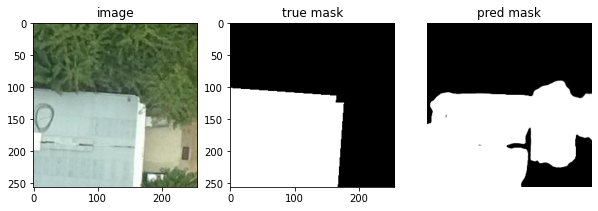

In [50]:
test_prediction(all_images[-28], all_masks[-28])